<a href="https://colab.research.google.com/github/DanielaCentellas/Project-Object-Detection-Tomatoes/blob/main/Pre_processing_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing to images of roboflow dataset

In [ ]:
%matplotlib inline

#Include necessary libraries
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, requests
import numpy as np
import copy

In [ ]:
# Export roboflow dataset
%cd /contentyn
!curl -L "https://app.roboflow.com/ds/rALDFXVgWu?key=aHvcBkVrn2" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

[Errno 2] No such file or directory: '/contentyn'
/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1560      0 --:--:-- --:--:-- --:--:--  1560
100 5982k  100 5982k    0     0  6174k      0 --:--:-- --:--:-- --:--:-- 27.8M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/DSC04785_jpg.rf.449cb65955c7a53a3e9af4519017b52e.jpg  
 extracting: test/images/DSC04798_jpg.rf.95b17b351ff1c66001f3ea6947f3e057.jpg  
 extracting: test/images/DSC04804_jpg.rf.709402a09aa4b9f3c142b85b03cb0ef3.jpg  
 extracting: test/images/DSC04829_jpg.rf.c286ae34eac555058bbd7a1842027253.jpg  
 extracting: test/images/DSC04844_jpg.rf.33645f7bdd59d09b712ae61b0376d4a1.jpg  
 extracting: test/images/DSC04869_jpg.rf.6a6067e65c65b809ecc9e783922a5627.jpg  
 

In [ ]:
# Obtain dataset images with the correct path and convert BGR to RGB
filenames = []
images = []
grays = []
c=0
for filename in os.listdir('train/images'):
  filenames.append(filename)
  image = cv2.imread("train/images/"+filename)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  #Save images to an array
  images.append(image)
  grays.append(gray)

images = np.array(images)
print('Total Number of Tomatoes:', len(images))

Total Number of Tomatoes: 261


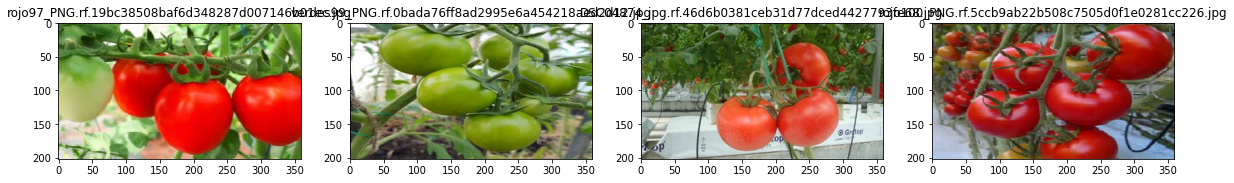

In [ ]:
#Show four image to know if are the correct images
num_images = 4

plt.figure(figsize=(20, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    index = np.random.choice(range(len(images)))
    image = images[index]
    filename=filenames[index]
    plt.imshow(image)
    plt.title(filename)

# Power Law Transformation

In [ ]:
#Implement Power Law Transformation to all images
gamma = 0.95
gamma_cor = []
for i in range(len(images)):
    image_g = images[i]
    gamma_corrected = (np.array((image_g+0.99) ** gamma, dtype = 'uint8'))
    gamma_cor.append(gamma_corrected)
    plt.figure(figsize=(8,8))
    plt.imshow(gamma_corrected)
    plt.axis("off")
    plt.title("gamma "+str(i))

# Principal Component Analysis (PCA)

In [ ]:
# PCA of Color images
from sklearn.decomposition import PCA
comp = []
for i in range(len(images)):
    image_pca = gamma_cor[i]
    r,g,b = cv2.split(image_pca)
    pca = PCA(90)
    r_trans = pca.fit_transform(r)
    r_inv = pca.inverse_transform(r_trans)

    g_trans = pca.fit_transform(g)
    g_inv = pca.inverse_transform(g_trans)

    b_trans = pca.fit_transform(b)
    b_inv = pca.inverse_transform(b_trans)

    img_com = (np.dstack((r_inv, g_inv, b_inv))).astype(np.uint8)
    comp.append(img_com)

    plt.figure(figsize=(8,8))
    plt.imshow(img_com)
    plt.axis("off")
    plt.title("Image "+str(i))

In [ ]:
#Save processed images
for i in range(len(images)):
  pp = cv2.cvtColor(comp[i], cv2.COLOR_RGB2BGR)
  ak = cv2.imwrite("/content/train/pre-pros/"+filenames[i], pp)

In [ ]:
#Zip a folder 
import os
import zipfile
    
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file), 
                       os.path.relpath(os.path.join(root, file), 
                                       os.path.join(path, '..')))
      
zipf = zipfile.ZipFile('Pre-pros-260.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir('/content/train/pre-pros', zipf)
zipf.close()

## References
[1] PCA for Image Data https://www.askpython.com/python/examples/principal-component-analysis-for-image-data

[2] Zip archive https://stackoverflow.com/questions/1855095/how-to-create-a-zip-archive-of-a-directory-in-python#